In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_data = pd.read_csv('../input/dataanalystnanodegree/city_data.csv')
global_data = pd.read_csv('../input/dataanalystnanodegree/global_data.csv')

global_data = global_data[(global_data['year']<=2013) & (global_data['year']>=1847)]
victoria_data = city_data[(city_data['city']=='Victoria') & (city_data['year']<=2013) & (city_data['year']>=1847)][['year','avg_temp']]
combo = global_data.merge(victoria_data,on='year')
combo.columns = ['year', 'global_temp', 'victoria_temp']
combo.head()

,year,global_temp,victoria_temp
0,1847,8.09,8.75
1,1848,7.98,6.34
2,1849,7.98,6.36
3,1850,7.90,6.78
4,1851,8.18,7.56


In [3]:
combo = pd.read_csv('../input/dataanalystnanodegree/combo_data.csv')
combo.columns = ['Year','Global','Victoria','Dallas']

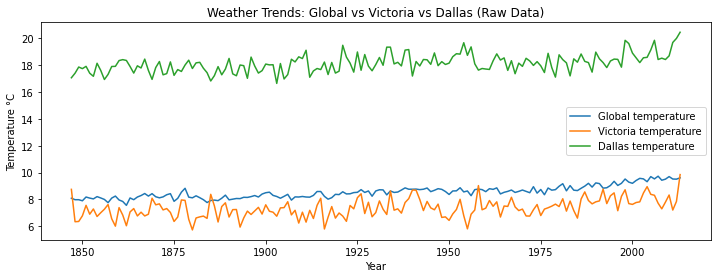

In [4]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year',y='Global',data=combo,label='Global temperature')
sns.lineplot(x='Year',y='Victoria',data=combo,label='Victoria temperature')
sns.lineplot(x='Year',y='Dallas',data=combo,label='Dallas temperature')
plt.title('Weather Trends: Global vs Victoria vs Dallas (Raw Data)')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.legend()

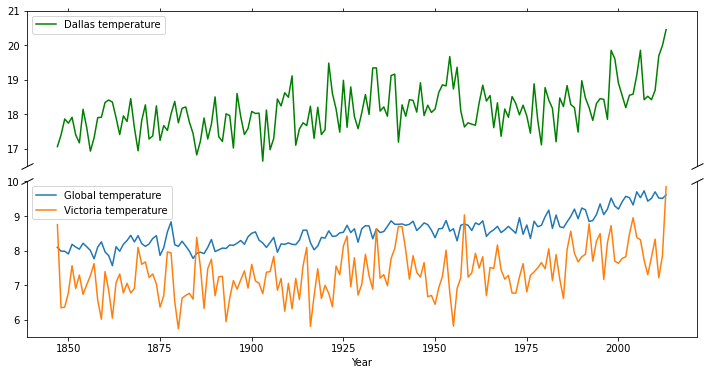

In [5]:
# https://matplotlib.org/3.3.0/gallery/subplots_axes_and_figures/broken_axis.html

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12,6))
fig.subplots_adjust(hspace=0.1) 

sns.lineplot(x='Year',y='Dallas',data=combo,label='Dallas temperature',color='g',ax=ax1)
sns.lineplot(x='Year',y='Global',data=combo,label='Global temperature',ax=ax2)
sns.lineplot(x='Year',y='Victoria',data=combo,label='Victoria temperature',ax=ax2)

ax1.set_ylim(16.5,21)
ax2.set_ylim(5.5,10)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Year')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

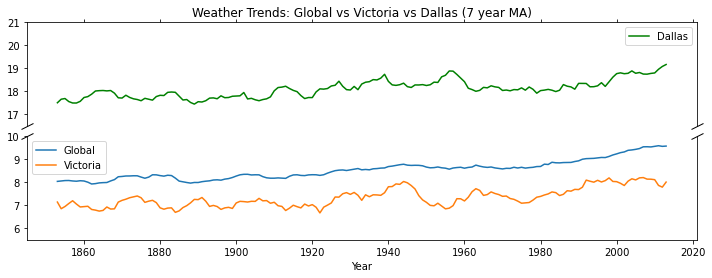

In [6]:
def plot_moving_average(n_window,df):
    df_update = df.rolling(window=n_window,center=False,on='Year').mean().dropna()

    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12,4))
    fig.subplots_adjust(hspace=0.1) 

    sns.lineplot(x='Year',y='Dallas',data=df_update,label='Dallas',color='g',ax=ax1)
    sns.lineplot(x='Year',y='Global',data=df_update,label='Global',ax=ax2)
    sns.lineplot(x='Year',y='Victoria',data=df_update,label='Victoria',ax=ax2)
    
    ax1.set_title('Weather Trends: Global vs Victoria vs Dallas ({} year MA)'.format(n_window))
    ax1.set_ylim(16.5,21)
    ax2.set_ylim(5.5,10)
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax2.set_xlabel('Year')

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False) 
    ax2.xaxis.tick_bottom()

    d = .5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
#plot_moving_average(5,combo)
plot_moving_average(7,combo)
#plot_moving_average(10,combo)
#plot_moving_average(15,combo)
#plot_moving_average(25,combo)

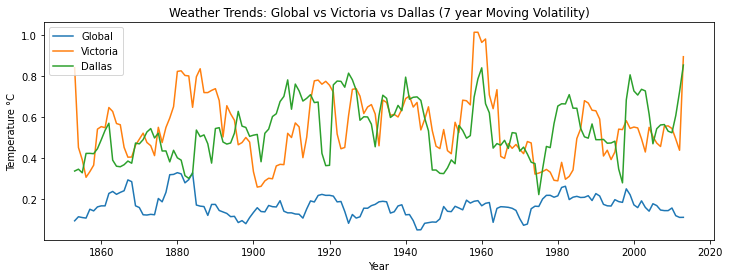

In [7]:
combo_update = combo.rolling(window=7,center=False,on='Year').std().dropna()

plt.figure(figsize=(12,4))
sns.lineplot(x='Year',y='Global',data=combo_update,label='Global')
sns.lineplot(x='Year',y='Victoria',data=combo_update,label='Victoria')
sns.lineplot(x='Year',y='Dallas',data=combo_update,label='Dallas')
plt.title('Weather Trends: Global vs Victoria vs Dallas (7 year Moving Volatility)')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.legend()

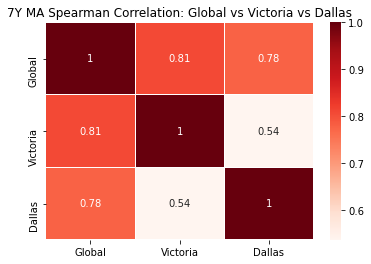

In [8]:
plt.title('7Y MA Spearman Correlation: Global vs Victoria vs Dallas')
labels = ['Global','Victoria','Dallas']
#sns.heatmap(combo.drop(['Year'],axis=1).corr(method='spearman'),annot=True,xticklabels=labels,yticklabels=labels,linewidths=0.1,cmap='Reds')
sns.heatmap(combo.rolling(window=7,center=False,on='Year').mean().dropna().drop(['Year'],axis=1).corr(method='spearman'),annot=True,xticklabels=labels,yticklabels=labels,linewidths=0.1,cmap='Reds')

In [9]:
combo_reshape = combo.rolling(window=7,center=False,on='Year').mean().dropna()
combo_reshape = combo_reshape.melt(id_vars=['Year'],var_name='City',value_name='Temperature')
combo_reshape['Period'] = combo_reshape['Year'].apply(lambda x: '1984-2013' if (x>1983 and x<=2013) else('1954-1983' if (x>1953 and x<=1983) else('1924-1953' if (x>1923 and x<=1953) else ('1894-1923' if (x>1893 and x<=1923) else '1853-1893'))))
combo_reshape.head()

,Year,City,Temperature,Period
0,1853,Global,8.038571,1853-1893
1,1854,Global,8.055714,1853-1893
2,1855,Global,8.074286,1853-1893
3,1856,Global,8.077143,1853-1893
4,1857,Global,8.057143,1853-1893


Text(0.5, 1.0, 'Dallas')

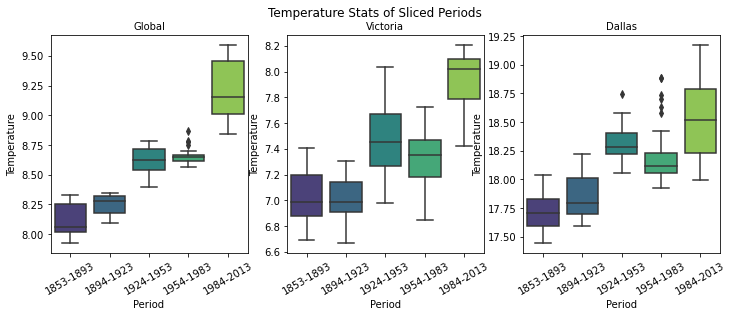

In [10]:
fig,axes = plt.subplots(nrows=1,ncols=3,sharey=False,figsize=(12,4))
fig.suptitle('Temperature Stats of Sliced Periods')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)

sns.boxplot(x='Period',y='Temperature',data=combo_reshape[combo_reshape['City']=='Global'],ax=axes[0],palette='viridis')
axes[0].set_title('Global',fontsize=10)
sns.boxplot(x='Period',y='Temperature',data=combo_reshape[combo_reshape['City']=='Victoria'],ax=axes[1],palette='viridis')
axes[1].set_title('Victoria',fontsize=10)
sns.boxplot(x='Period',y='Temperature',data=combo_reshape[combo_reshape['City']=='Dallas'],ax=axes[2],palette='viridis')
axes[2].set_title('Dallas',fontsize=10)

In [11]:
combo_reshape = pd.pivot_table(combo_reshape,values='Temperature',index=['City','Year'],columns='Period').reset_index()

In [12]:
pd.set_option('display.width', 800)

global_stat= pd.DataFrame(combo_reshape[combo_reshape['City']=='Global'].drop(['Year'],axis=1).describe().T)
global_stat['diff'] = global_stat['max']-global_stat['min']
global_stat['median chng'] = global_stat['50%'].diff()

victoria_stat= pd.DataFrame(combo_reshape[combo_reshape['City']=='Victoria'].drop(['Year'],axis=1).describe().T)
victoria_stat['diff'] = victoria_stat['max']-victoria_stat['min']
victoria_stat['median chng'] = victoria_stat['50%'].diff()

dallas_stat= pd.DataFrame(combo_reshape[combo_reshape['City']=='Dallas'].drop(['Year'],axis=1).describe().T)
dallas_stat['diff'] = dallas_stat['max']-dallas_stat['min']
dallas_stat['median chng'] = dallas_stat['50%'].diff()

print('Global Temperature:\n',global_stat)
print('\nVictoria Temperature:\n',victoria_stat)
print('\nDallas Temperature:\n',dallas_stat)

Global Temperature:
            count      mean       std       min       25%       50%       75%       max      diff  median chng
Period                                                                                                       
1853-1893   41.0  8.117596  0.126492  7.925714  8.020000  8.062857  8.252857  8.325714  0.400000          NaN
1894-1923   30.0  8.249476  0.082943  8.091429  8.178214  8.280000  8.323929  8.347143  0.255714     0.217143
1924-1953   30.0  8.620762  0.099105  8.397143  8.541429  8.619286  8.712500  8.784286  0.387143     0.339286
1954-1983   30.0  8.657048  0.064481  8.568571  8.616786  8.646429  8.665357  8.870000  0.301429     0.027143
1984-2013   30.0  9.205476  0.266588  8.842857  9.007857  9.155000  9.457143  9.588571  0.745714     0.508571

Victoria Temperature:
            count      mean       std       min       25%       50%       75%       max      diff  median chng
Period                                                                     

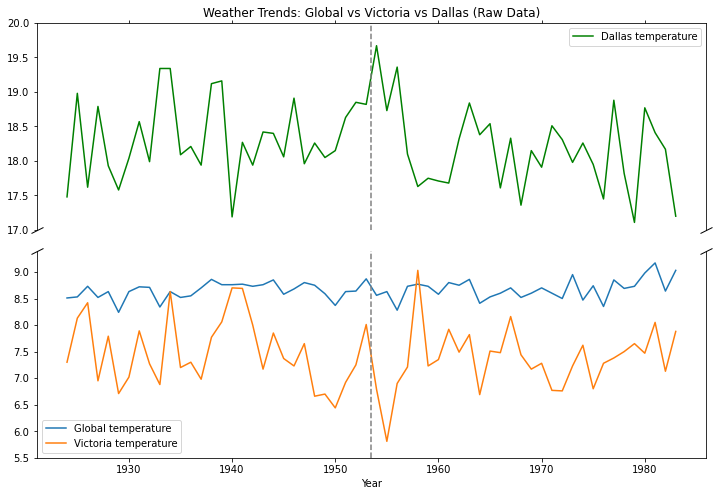

In [13]:
# https://matplotlib.org/3.3.0/gallery/subplots_axes_and_figures/broken_axis.html

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12,8))
fig.subplots_adjust(hspace=0.1) 

sns.lineplot(x='Year',y='Dallas',data=combo[(combo['Year']>=1924) & (combo['Year']<=1983)],label='Dallas temperature',color='g',ax=ax1)
sns.lineplot(x='Year',y='Global',data=combo[(combo['Year']>=1924) & (combo['Year']<=1983)],label='Global temperature',ax=ax2)
sns.lineplot(x='Year',y='Victoria',data=combo[(combo['Year']>=1924) & (combo['Year']<=1983)],label='Victoria temperature',ax=ax2)
ax1.axvline(1953.5, color="grey", linestyle="--")
ax2.axvline(1953.5, color="grey", linestyle="--")

ax1.set_title('Weather Trends: Global vs Victoria vs Dallas (Raw Data)'.format(7))
ax1.set_ylim(17,20)
ax2.set_ylim(5.5,9.4)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Year')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

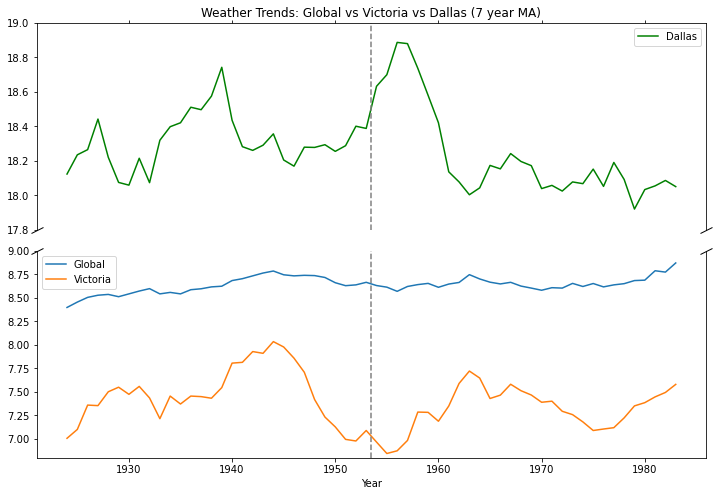

In [14]:
df_update = combo.rolling(window=7,center=False,on='Year').mean().dropna()

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(12,8))
fig.subplots_adjust(hspace=0.1) 

sns.lineplot(x='Year',y='Dallas',data=df_update[(df_update['Year']>=1924) & (df_update['Year']<=1983)],label='Dallas',color='g',ax=ax1)
sns.lineplot(x='Year',y='Global',data=df_update[(df_update['Year']>=1924) & (df_update['Year']<=1983)],label='Global',ax=ax2)
sns.lineplot(x='Year',y='Victoria',data=df_update[(df_update['Year']>=1924) & (df_update['Year']<=1983)],label='Victoria',ax=ax2)
ax1.axvline(1953.5, color="grey", linestyle="--")
ax2.axvline(1953.5, color="grey", linestyle="--")

ax1.set_title('Weather Trends: Global vs Victoria vs Dallas ({} year MA)'.format(7))
ax1.set_ylim(17.8,19)
ax2.set_ylim(6.8,9)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Year')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


## TODO 1: Learn how to plot changepoint of a trend

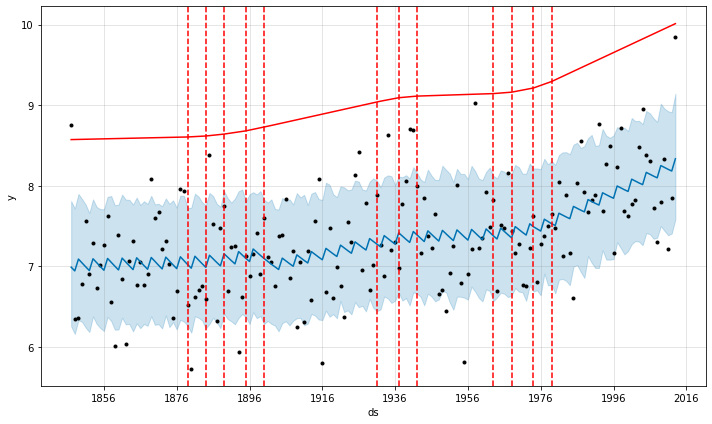

In [15]:
# https://facebook.github.io/prophet/docs/trend_changepoints.html
combo1 = combo[['Year','Victoria']]
combo1.columns = ['ds', 'y']

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_prior_scale=0.3)
forecast = m.fit(combo1).predict(combo1)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## TODO 2: Learn how to decide window size for a moving average filter

Text(0, 0.5, 'SAD')

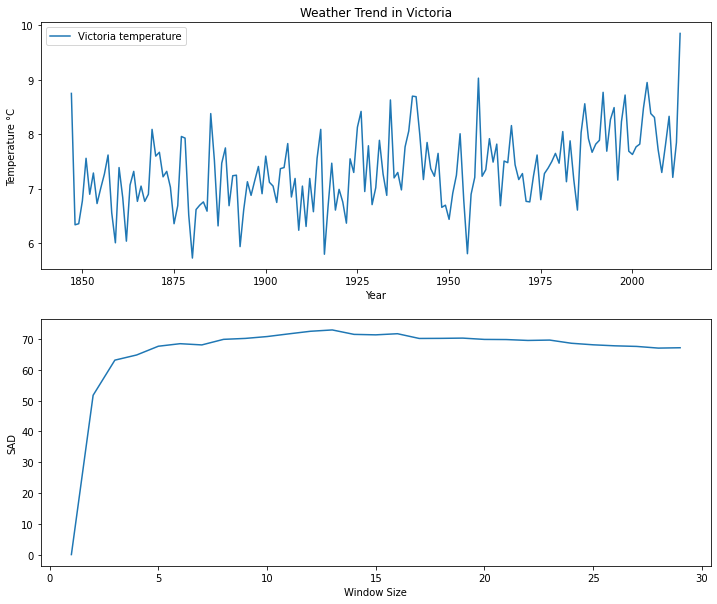

In [16]:
# reference: https://www.mathworks.com/matlabcentral/answers/315739-how-to-decide-window-size-for-a-moving-average-filter

def get_moving_average(n_window,df):
    df_update = df.rolling(window=n_window,center=False,on='Year').mean().dropna()
    #df_update = df.rolling(window=n_window,center=False,on='year').mean().fillna(0)
    return df_update

def get_combo_slice(df,benchmark):
    diff = len(df)-len(benchmark)
    df_update = df.drop(df.index[0:diff])
    return df_update


fig,axes = plt.subplots(nrows=2,ncols=1,sharey=False,figsize=(12,10))
for ax in fig.axes:
    plt.sca(ax)

sns.lineplot(x='Year',y='Victoria',data=combo,label='Victoria temperature',ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Temperature °C')
axes[0].set_title('Weather Trend in Victoria')

sad = pd.DataFrame(columns=['windowSize','SAD'],dtype=float)
sad['windowSize'] = np.arange(0,30,1).tolist()

for k in range(1,len(sad)):
    smoothed = get_moving_average(k,combo)
    combo_slice = get_combo_slice(combo,smoothed)
    
    sad.at[k, 'SAD'] = (sum(abs(smoothed['Victoria'] - combo_slice['Victoria'])))

sns.lineplot(x='windowSize',y='SAD',data=sad,ax=axes[1])
axes[1].set_xlabel('Window Size')
axes[1].set_ylabel('SAD')